In [20]:
import os
import xarray as xr

# Folder where all the .nc files are stored
#nc_directory = "../CAMELS_SW/output_data/nival_suf_data"
nc_directory = "../CAMELS_SW/output_data_TP_adjust/nival_all"

# List of all .nc files in the directory
nc_files = [os.path.join(nc_directory, f) for f in os.listdir(nc_directory) if f.endswith('.nc')]

# Load each .nc file as an xarray Dataset and compute the mean of each variable
datasets = [xr.open_dataset(f) for f in nc_files]

# Take the mean across all datasets for each variable
mean_ds = xr.concat(datasets, dim="iteration").mean(dim="iteration")

# Display the final dataset with mean values
display(mean_ds)


C:\Users\lauri\anaconda3\envs\CondaNew\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:        (init_date: 7, target_period: 7)
Coordinates:
  * target_period  (target_period) object '1Jan-31Jul' ... '1Jul-31Jul'
  * init_date      (init_date) object '01/01' '01/02' ... '01/06' '01/07'
Data variables:
    R2             (init_date, target_period) float64 0.1366 0.1037 ... 0.1597
    KGE"           (init_date, target_period) float64 -0.3673 ... -0.5834
    KGE"_r         (init_date, target_period) float64 -0.1135 ... -0.3029
    KGE"_alpha     (init_date, target_period) float64 0.2631 0.2746 ... 0.155
    KGE"_beta      (init_date, target_period) float64 -0.01286 ... 0.03429
    perc_diff      (init_date, target_period) float64 3.943 4.176 ... nan 24.03

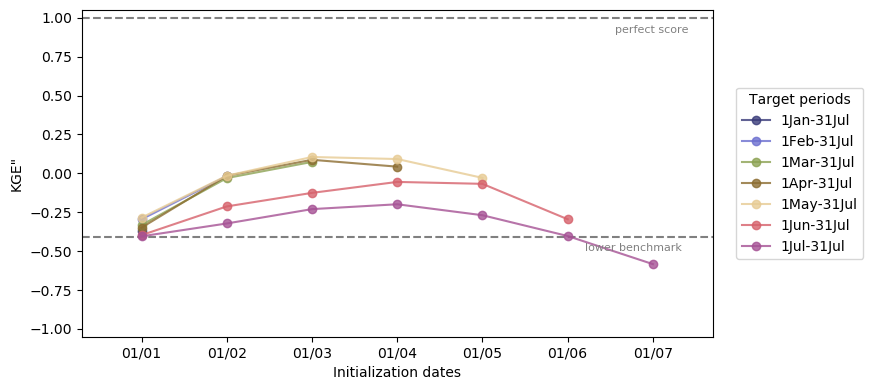

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Use the mean dataset loaded earlier (mean_ds) for the 'KGE"' data
KGE_mean = mean_ds['KGE"']

# Initialize elements for the plot
fig = plt.figure(figsize=(9, 4))
elem = -1
cmap = plt.cm.get_cmap('tab20b')
rgbas = []
target_periods = mean_ds.target_period.values
init_dates = mean_ds.init_date.values

# Loop over the target periods to plot
for t in target_periods:
    elem += 1
    rgba = cmap((1 * elem) / len(target_periods))
    rgbas.append(rgba)

    # Select and plot the KGE" mean data for each target period
    toplot = KGE_mean.sel(target_period=t)
    plt.plot(np.arange(len(toplot.init_date)), toplot.values, marker='o', color=rgba, alpha=.8, label=t)

# Add elements to the plot
plt.ylim(-1.05, 1.05)
plt.xlim(-.7, len(init_dates) - .3)
plt.plot([-.7, len(init_dates) - .3], [-.41, -.41], color='grey', ls='--', zorder=1)
plt.annotate('lower benchmark', (len(init_dates) - 1.8, -.5), color='grey', fontsize=8)
plt.plot([-.7, len(init_dates) - .3], [1, 1], color='grey', ls='--', zorder=1)
plt.annotate('perfect score', (len(init_dates) - 1.45, .9), color='grey', fontsize=8)
plt.xticks(np.arange(0, len(init_dates)), init_dates)
plt.xlabel('Initialization dates')
plt.ylabel('KGE"')
plt.legend(title='Target periods', loc='center right', bbox_to_anchor=(1.25, .5))
plt.tight_layout()

# Display the plot
plt.show()

In [22]:
# Save the figure
#fig.savefig('../CAMELS_SW/output_plots/evaluation/KGE_nival_mean.png', dpi=300)

fig.savefig('../CAMELS_SW/output_plots_TP_adjust/evaluation/KGE_nival_mean.png', dpi=300)

In [23]:
# List of all .nc files in the directory
nc_files = [os.path.join(nc_directory, f) for f in os.listdir(nc_directory) if f.endswith('.nc')]

# Load each .nc file as an xarray Dataset and compute the median of each variable
datasets = [xr.open_dataset(f) for f in nc_files]

# Take the median across all datasets for each variable
median_ds = xr.concat(datasets, dim="iteration").median(dim="iteration")

# Display the final dataset with median values
median_ds

<xarray.Dataset>
Dimensions:        (init_date: 7, target_period: 7)
Coordinates:
  * target_period  (target_period) object '1Jan-31Jul' ... '1Jul-31Jul'
  * init_date      (init_date) object '01/01' '01/02' ... '01/06' '01/07'
Data variables:
    R2             (init_date, target_period) float64 0.04 0.05 ... nan 0.09
    KGE"           (init_date, target_period) float64 -0.28 -0.24 ... nan -0.57
    KGE"_r         (init_date, target_period) float64 -0.02 0.03 ... nan -0.3
    KGE"_alpha     (init_date, target_period) float64 0.23 0.25 ... nan 0.15
    KGE"_beta      (init_date, target_period) float64 -0.01 -0.0 ... nan 0.01
    perc_diff      (init_date, target_period) float64 3.765 3.91 ... nan 21.96

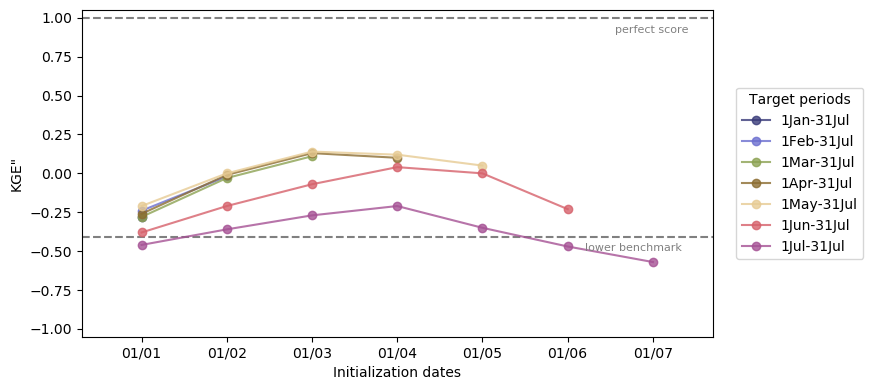

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Use the median dataset loaded earlier (median_ds) for the 'KGE"' data
KGE_median = median_ds['KGE"']

# Initialize elements for the plot
fig = plt.figure(figsize=(9, 4))
elem = -1
cmap = plt.cm.get_cmap('tab20b')
rgbas = []
target_periods = median_ds.target_period.values
init_dates = median_ds.init_date.values

# Loop over the target periods to plot
for t in target_periods:
    elem += 1
    rgba = cmap((1 * elem) / len(target_periods))
    rgbas.append(rgba)

    # Select and plot the KGE" median data for each target period
    toplot = KGE_median.sel(target_period=t)
    plt.plot(np.arange(len(toplot.init_date)), toplot.values, marker='o', color=rgba, alpha=.8, label=t)

# Add elements to the plot
plt.ylim(-1.05, 1.05)
plt.xlim(-.7, len(init_dates) - .3)
plt.plot([-.7, len(init_dates) - .3], [-.41, -.41], color='grey', ls='--', zorder=1)
plt.annotate('lower benchmark', (len(init_dates) - 1.8, -.5), color='grey', fontsize=8)
plt.plot([-.7, len(init_dates) - .3], [1, 1], color='grey', ls='--', zorder=1)
plt.annotate('perfect score', (len(init_dates) - 1.45, .9), color='grey', fontsize=8)
plt.xticks(np.arange(0, len(init_dates)), init_dates)
plt.xlabel('Initialization dates')
plt.ylabel('KGE"')
plt.legend(title='Target periods', loc='center right', bbox_to_anchor=(1.25, .5))
plt.tight_layout()

# Display the plot
plt.show()


In [25]:
# Save the figure
fig.savefig('../CAMELS_SW/output_plots_TP_adjust/evaluation/KGE_nival_all_median.png', dpi=300)

C:\Users\lauri\anaconda3\envs\CondaNew\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\lauri\anaconda3\envs\CondaNew\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\lauri\anaconda3\envs\CondaNew\lib\site-packages\matplotlib\cbook\__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\lauri\anaconda3\envs\CondaNew\lib\site-packages\matplotlib\cbook\__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],
C:\Users\lauri\anaconda3\envs\CondaNew\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\lauri\anaconda3\envs\CondaNew\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in gr

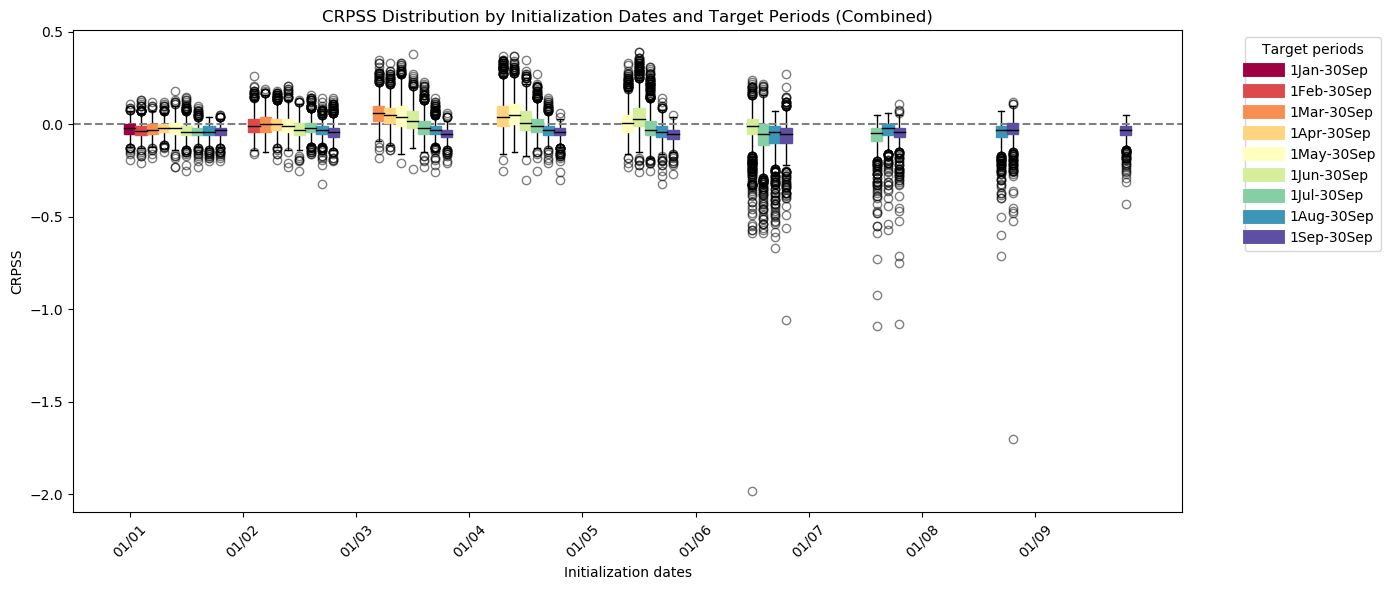

In [7]:
# Probabilistic verification
import os
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Folder where all the .nc files are stored
directory = "../CAMELS_SW/output_data/probabilistic_niv_suf"

# Initialize an empty list to store the CRPSS data from each file
all_crpss_data = []

# Loop through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".nc"):
        file_path = os.path.join(directory, filename)
        
        # Open the NetCDF file
        data = xr.open_dataset(file_path)
        
        # Extract the CRPSS data and convert it to a DataFrame
        crpss_data = data['CRPSS'].to_dataframe().reset_index()
        
        # Append the data to our list
        all_crpss_data.append(crpss_data)

# Concatenate all CRPSS data into a single DataFrame
combined_crpss_data = pd.concat(all_crpss_data, ignore_index=True)

# Define unique target periods and assign each a color
target_periods = combined_crpss_data['target_period'].unique()
colors = plt.cm.Spectral(np.linspace(0, 1, len(target_periods)))  # Use a color map

# Plotting
fig=plt.figure(figsize=(14, 6))

# Iterate over each target period to plot individually
for i, (color, target_period) in enumerate(zip(colors, target_periods)):
    # Filter data for the current target period
    period_data = combined_crpss_data[combined_crpss_data['target_period'] == target_period]
    
    # For each initialization date, create a boxplot with an offset for visual separation
    for j, init_date in enumerate(period_data['init_date'].unique()):
        # Extract CRPSS values for this init date and target period
        values = period_data[period_data['init_date'] == init_date]['CRPSS'].values
        # Plot boxplot at the correct x-offset (j + small offset for each target period)
        plt.boxplot(values, positions=[j + i * 0.1], widths=0.1, patch_artist=True,
                    boxprops=dict(facecolor=color, color=color),
                    medianprops=dict(color="black"),
                    flierprops=dict(marker='o', color=color, alpha=0.5))

# Set x-axis labels to the unique initialization dates
plt.xticks(ticks=range(len(combined_crpss_data['init_date'].unique())), 
           labels=combined_crpss_data['init_date'].unique(), rotation=45)

# Add plot labels and title
plt.xlabel("Initialization dates")
plt.ylabel("CRPSS")
plt.title("CRPSS Distribution by Initialization Dates and Target Periods (Combined)")
plt.axhline(0, color="gray", linestyle="--")

# Create a custom legend
for color, target_period in zip(colors, target_periods):
    plt.plot([], [], color=color, label=target_period, linewidth=10)
plt.legend(title="Target periods", bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()


In [8]:
fig.savefig('../CAMELS_SW/evaluation/CRPPSS_nival_suf_median.png', dpi=300)

C:\Users\lauri\anaconda3\envs\CondaNew\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\lauri\anaconda3\envs\CondaNew\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\lauri\anaconda3\envs\CondaNew\lib\site-packages\matplotlib\cbook\__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\lauri\anaconda3\envs\CondaNew\lib\site-packages\matplotlib\cbook\__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],
C:\Users\lauri\anaconda3\envs\CondaNew\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\lauri\anaconda3\envs\CondaNew\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in gr

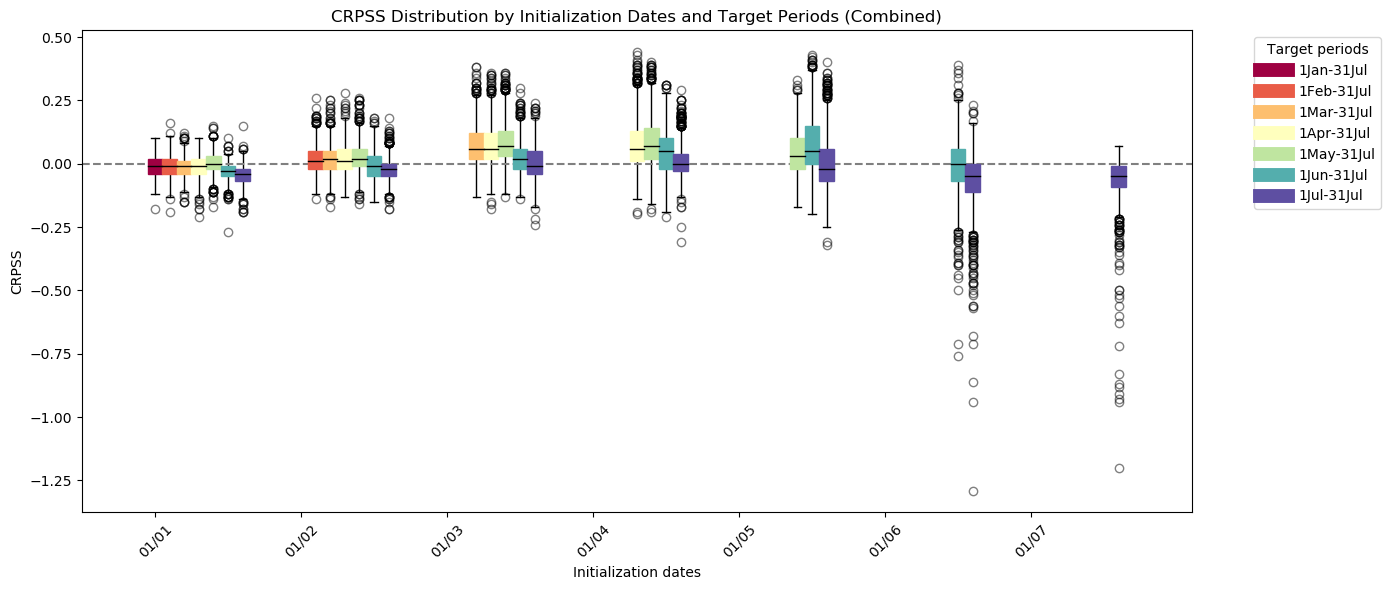

In [5]:
# Probabilistic verification
import os
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Folder where all the .nc files are stored
directory = "../CAMELS_SW/output_data_TP_adjust/probabilistic_niv_all"

# Initialize an empty list to store the CRPSS data from each file
all_crpss_data = []

# Loop through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".nc"):
        file_path = os.path.join(directory, filename)
        
        # Open the NetCDF file
        data = xr.open_dataset(file_path)
        
        # Extract the CRPSS data and convert it to a DataFrame
        crpss_data = data['CRPSS'].to_dataframe().reset_index()
        
        # Append the data to our list
        all_crpss_data.append(crpss_data)

# Concatenate all CRPSS data into a single DataFrame
combined_crpss_data = pd.concat(all_crpss_data, ignore_index=True)

# Define unique target periods and assign each a color
target_periods = combined_crpss_data['target_period'].unique()
colors = plt.cm.Spectral(np.linspace(0, 1, len(target_periods)))  # Use a color map

# Plotting
fig=plt.figure(figsize=(14, 6))

# Iterate over each target period to plot individually
for i, (color, target_period) in enumerate(zip(colors, target_periods)):
    # Filter data for the current target period
    period_data = combined_crpss_data[combined_crpss_data['target_period'] == target_period]
    
    # For each initialization date, create a boxplot with an offset for visual separation
    for j, init_date in enumerate(period_data['init_date'].unique()):
        # Extract CRPSS values for this init date and target period
        values = period_data[period_data['init_date'] == init_date]['CRPSS'].values
        # Plot boxplot at the correct x-offset (j + small offset for each target period)
        plt.boxplot(values, positions=[j + i * 0.1], widths=0.1, patch_artist=True,
                    boxprops=dict(facecolor=color, color=color),
                    medianprops=dict(color="black"),
                    flierprops=dict(marker='o', color=color, alpha=0.5))

# Set x-axis labels to the unique initialization dates
plt.xticks(ticks=range(len(combined_crpss_data['init_date'].unique())), 
           labels=combined_crpss_data['init_date'].unique(), rotation=45)

# Add plot labels and title
plt.xlabel("Initialization dates")
plt.ylabel("CRPSS")
plt.title("CRPSS Distribution by Initialization Dates and Target Periods (Combined)")
plt.axhline(0, color="gray", linestyle="--")

# Create a custom legend
for color, target_period in zip(colors, target_periods):
    plt.plot([], [], color=color, label=target_period, linewidth=10)
plt.legend(title="Target periods", bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()


In [6]:
fig.savefig('../CAMELS_SW/evaluation_TP_adjust/CRPPSS_nival_suf_median.png', dpi=300)